<a href="https://colab.research.google.com/github/yahyalito/Ibrahim_Yahya_IP_Week_1_Core/blob/master/Ibrahim_Yahya_IP_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDEPENDENT PROJECT

## Loading The Dataset

In [1]:
pip install factor_analyzer==0.2.3

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

In [0]:
#Reading the dataset 
finance = pd.read_csv("http://bit.ly/FinancialDataset")

In [15]:
#display first five rows of our data
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
#Check for number of columns and rows
finance.shape

(23524, 13)

In [8]:
#display last five rows of our data

finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [9]:

finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# ** Research Question**

which individuals are most likely to have or use a bank account



## Tidying the dataset

In [17]:
#checking for missing values
finance.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [19]:

#changing column names 
finance.rename(columns={"Has a Bank account":"Has_a_Bank_account",
                       "Type of Location" : "Type_of_Location",
                       "Cell Phone Access" : "Cell_Phone_Access",
                       "The relathip with head":"The_relationship_with_head",
                       "Level of Educuation" :"Level_of_Education",
                       "Type of Job" :"Type_of_Job",
                       "Respondent Age" : "Respondent_Age"} , inplace=True)
finance.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relationship_with_head,marital_status,Level_of_Education,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#Null values dropped 
finance_dropped = finance.dropna()

In [85]:
#check new number of rows and columns
finance_dropped.shape

(23343, 13)

In [86]:
finance_uniq = finance_dropped.copy()
finance_uniq.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relationship_with_head,marital_status,Level_of_Education,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [24]:
finance_dropped = finance_dropped.drop("uniqueid", axis=1)
finance_dropped.shape

(23343, 12)

In [0]:
#Uncomment to get summary of data 
#Helpful to understand the dataset, but shallow 
#pandas_profiling.ProfileReport(finance_dropped)

In [0]:
#Checking for duplicates

finance_dropped = finance_dropped.drop_duplicates()


In [29]:
# Duplicate values are dropped
finance_dropped.shape

(18972, 12)

In [0]:
# Checking for tally of unique items in each column

In [30]:
finance_dropped.country.value_counts()


Rwanda      6648
Kenya       5613
Tanzania    4742
Uganda      1969
Name: country, dtype: int64

In [32]:
finance_dropped.groupby('country')['Level_of_Education'].value_counts()

country   Level_of_Education             
Kenya     Primary education                  2379
          Secondary education                1610
          No formal education                 903
          Vocational/Specialised training     431
          Tertiary education                  282
          Other/Dont know/RTA                   8
Rwanda    Primary education                  3284
          No formal education                1765
          Secondary education                1321
          Tertiary education                  172
          Vocational/Specialised training      89
          6                                    17
Tanzania  Primary education                  2713
          No formal education                 890
          Tertiary education                  587
          Secondary education                 390
          Vocational/Specialised training     159
          6                                     3
Uganda    Primary education                  1032
        

In [33]:
finance_dropped.Type_of_Location.value_counts()

Rural    11670
Urban     7302
Name: Type_of_Location, dtype: int64

In [34]:
list(finance_dropped['Level_of_Education'].unique())

['Secondary education',
 'No formal education',
 'Vocational/Specialised training',
 'Primary education',
 'Tertiary education',
 'Other/Dont know/RTA',
 '6']

In [35]:
list(finance_dropped['Level_of_Education'].unique())

['Secondary education',
 'No formal education',
 'Vocational/Specialised training',
 'Primary education',
 'Tertiary education',
 'Other/Dont know/RTA',
 '6']

In [36]:
finance_dropped.Level_of_Education.value_counts()

Primary education                  9408
No formal education                3868
Secondary education                3812
Tertiary education                 1073
Vocational/Specialised training     777
6                                    26
Other/Dont know/RTA                   8
Name: Level_of_Education, dtype: int64

In [37]:
list(finance_dropped['Type_of_Job'].unique())

['Self employed',
 'Government Dependent',
 'Formally employed Private',
 'Informally employed',
 'Formally employed Government',
 'Farming and Fishing',
 'Remittance Dependent',
 'Other Income',
 'Dont Know/Refuse to answer',
 'No Income']

In [38]:
list(finance_dropped['marital_status'].unique())

['Married/Living together',
 'Widowed',
 'Single/Never Married',
 'Divorced/Seperated',
 'Dont know']

In [39]:
list(finance_dropped['The_relationship_with_head'].unique())

['Spouse',
 'Head of Household',
 'Other relative',
 'Child',
 'Parent',
 'Other non-relatives']

In [95]:
#Checking for unique values in year column
list(finance_dropped['year'].unique())


[2018, 2016, 2017]

In [94]:
#Removing outlier years
x = finance_dropped[finance_dropped['year'] > 2018].index
finance_dropped.drop(x, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [93]:
list(finance_dropped['year'].unique())

[2018, 2029, 2056, 2016, 2039, 2017]

In [43]:
finance_dropped.year.value_counts()

2018    7580
2016    6647
2017    4742
Name: year, dtype: int64

##**Analysis**

In [44]:
finance_dropped['Respondent_Age'].describe()


count    18969.000000
mean        39.535558
std         17.069317
min         16.000000
25%         26.000000
50%         36.000000
75%         50.000000
max        100.000000
Name: Respondent_Age, dtype: float64

In [45]:
finance_dropped['household_size'].describe()


count    18969.000000
mean         3.750751
std          2.360797
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [53]:
finance_dropped.columns

Index(['country', 'year', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'The_relationship_with_head', 'marital_status',
       'Level_of_Education', 'Type_of_Job'],
      dtype='object')

### Univariate Analysis

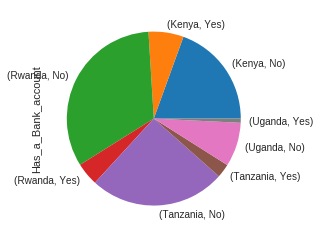

In [87]:
#Country , Has a bank account

finance_dropped.groupby('country')['Has_a_Bank_account'].value_counts().plot.pie()

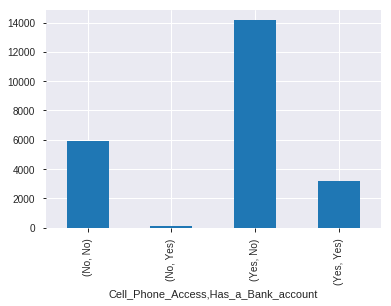

In [88]:
# Has cellphone , has bank account
finance_dropped.groupby('Cell_Phone_Access')['Has_a_Bank_account'].value_counts().plot.bar()

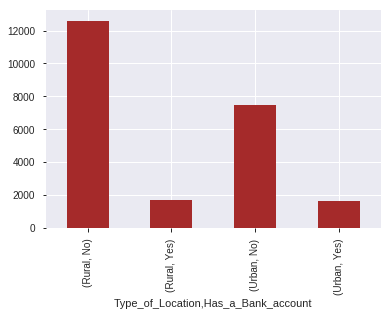

In [89]:
# location , has a bank account

finance_dropped.groupby(['Type_of_Location'])['Has_a_Bank_account'].value_counts().plot.bar(color = 'brown')

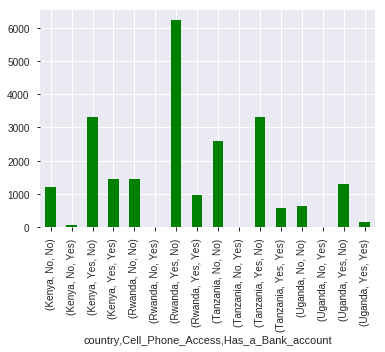

In [90]:
#country , has cellphone , has bank account

finance_dropped.groupby(['country','Cell_Phone_Access'])['Has_a_Bank_account'].value_counts().plot.bar(color = 'green')

### Bivariate Analysis

<Figure size 1008x1008 with 0 Axes>

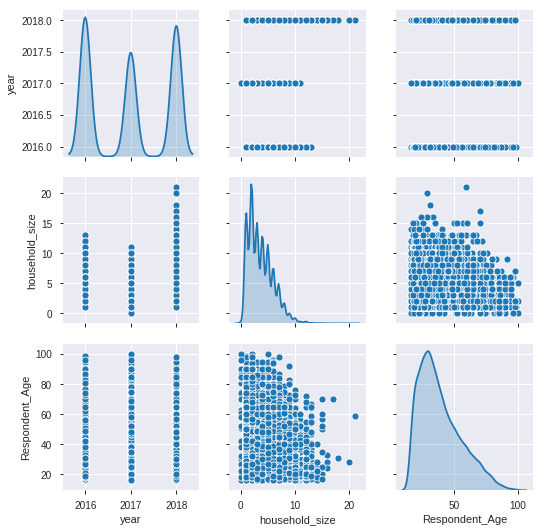

In [96]:
#Scatter showing the relationship between variables

plt.figure(figsize=(14, 14))
sns.pairplot(finance_dropped, diag_kind='kde');

In [60]:
# correlation between year, household size , respondents age
corr = finance_dropped.corr()
corr.style.background_gradient(cmap='coolwarm')


,year,household_size,Respondent_Age
year,1,-0.0279566,-0.0350514
household_size,-0.0279566,1,-0.125155
Respondent_Age,-0.0350514,-0.125155,1


In [61]:
finance_dropped.columns

Index(['country', 'year', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'The_relationship_with_head', 'marital_status',
       'Level_of_Education', 'Type_of_Job'],
      dtype='object')

<function matplotlib.pyplot.show>

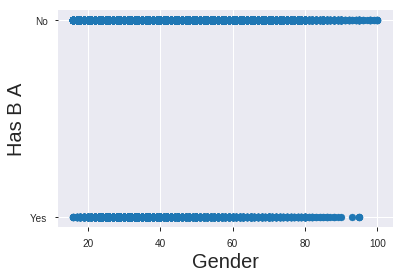

In [82]:
#Scatter showing relationship between gender aand having a bank account
#Linear Regression cannot be applied

y = finance_dropped["Has_a_Bank_account"]
x1 = finance_dropped["gender_of_respondent"]
plt.scatter(x1,y)
plt.xlabel("Gender" , fontsize=20)
plt.ylabel("Has B A" , fontsize=20)
plt.show

<function matplotlib.pyplot.show>

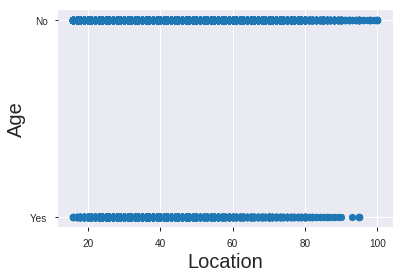

In [81]:
#Scatter showing relationship between age aand having a bank account
#Linear Regression cannot be applied

y = finance_dropped["Has_a_Bank_account"]
x1 = finance_dropped["Respondent_Age"]
plt.scatter(x1,y)
plt.xlabel("Location" , fontsize=20)
plt.ylabel("Age" , fontsize=20)
plt.show

### Multivariate Analysis

In [0]:
new_finance= pd.get_dummies(finance_dropped, prefix_sep='_', drop_first=True)
new_finance.head()

In [0]:
X = new_finance.drop('Has_a_Bank_account_Yes', 1)
y = new_finance['Has_a_Bank_account_Yes']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


In [0]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(new_finance)
chi_square_value, p_value


In [0]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(new_finance)

In [0]:
from factor_analyzer import FactorAnalyzer

In [0]:
fa = FactorAnalyzer()
fa.analyze(new_finance, 25, rotation=None)

ev, v = fa.get_eigenvalues()
ev

In [0]:
plt.scatter(range(1,new_finance.shape[1]+1),ev)
plt.plot(range(1,new_finance.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [0]:
fa = FactorAnalyzer()
fa.analyze(new_finance, 6, rotation="varimax")
fa.loadings

In [0]:
fa = FactorAnalyzer()
fa.analyze(new_finance, 5, rotation="varimax")
fa.loadings

In [0]:
fa.get_factor_variance()
